In [10]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import kendalltau, pointbiserialr, mannwhitneyu, theilslopes, linregress
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# Drive mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
def check_files(main_dataset):
    if (os.path.isfile(main_dataset)):
        print("Files found!")
    else:
        print("Files not found.")

main_dataset_csv = 'time-series-analysis-thesis.csv' #@param {type:"string"}
check_files(main_dataset_csv)
main_dataset_df = pd.read_csv(main_dataset_csv)

Files found!


In [13]:
td_columns = [
    'cbo', 'wmc', 'dit', 'rfc', 'lcom', 'npm', 'fanin', 'fanout',
    'noc', 'ncloc', 'duplicated_lines', 'duplicated_lines_density',
    'total_lines', 'high_td_classes', 'high_td_classes_density'
]

security_columns = [
    'sam_resource_handling_eval', 'sam_resource_handling_density',
    'sam_assignment_eval', 'sam_assignment_density',
    'sam_exception_handling_eval', 'sam_exception_handling_density',
    'sam_misused_functionality_eval', 'sam_misused_functionality_density',
    'sam_synchronization_eval', 'sam_synchronization_density',
    'sam_null_pointer_eval', 'sam_null_pointer_density',
    'sam_logging_eval', 'sam_logging_density', 'sam_cohesion_eval',
    'sam_cohesion_norm', 'sam_coupling_eval', 'sam_coupling_norm',
    'sam_complexity_eval', 'sam_complexity_norm', 'sam_encapsulation_eval',
    'sam_encapsulation_norm', 'sam_confidentiality_eval', 'sam_integrity_eval',
    'sam_availability_eval', 'sam_total_issues', 'security_index'
]

In [14]:
X = main_dataset_df['high_td_classes_density']
y = main_dataset_df['security_index']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('\nBreusch-Pagan Test for Heteroscedasticity:')
print('Lagrange multiplier statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('F-statistic:', bp_test[2])
print('p-value of F-statistic:', bp_test[3])
if bp_test[1] < 0.05:
    print('The Breusch-Pagan test suggests the presence of heteroscedasticity.')
else:
    print('The Breusch-Pagan test does not suggest the presence of heteroscedasticity.')


Breusch-Pagan Test for Heteroscedasticity:
Lagrange multiplier statistic: 0.026224015087850105
p-value: 0.8713544367608835
F-statistic: 0.025648732672040736
p-value of F-statistic: 0.8731282161563348
The Breusch-Pagan test does not suggest the presence of heteroscedasticity.


In [15]:
tau, p_value = kendalltau(main_dataset_df['high_td_classes_density'], main_dataset_df['security_index'])

print("\nKendall's Tau Correlation:")
print("Tau:", tau)
print("p-value:", p_value)


Kendall's Tau Correlation:
Tau: 0.13068469438951236
p-value: 0.06832342247143645



--- Project: dubbo ---

ADF Test for High TD Classes Density:
Test Statistic                 -0.928316
p-value                         0.778505
#Lags Used                      0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64

ADF Test for Security Index:
Test Statistic                -2.079168
p-value                        0.252973
#Lags Used                     5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: -0.0949, p-value: 0.7469


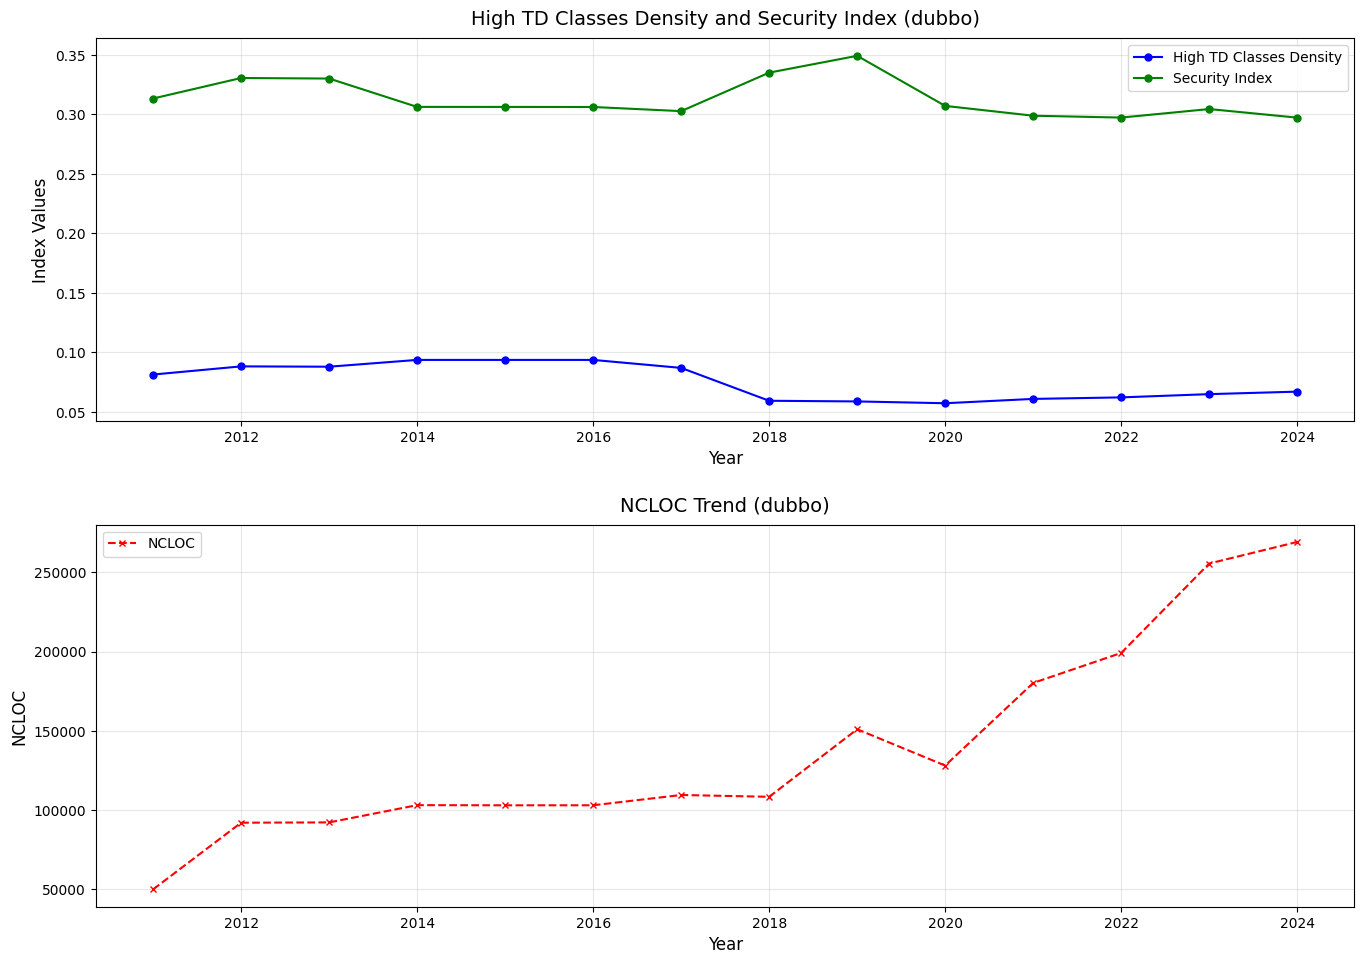


--- Project: elasticsearch ---

ADF Test for High TD Classes Density:
Test Statistic                 -2.340419
p-value                         0.159263
#Lags Used                      0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

ADF Test for Security Index:
Test Statistic                 4.781073
p-value                        1.000000
#Lags Used                     4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: 0.4505, p-value: 0.1223


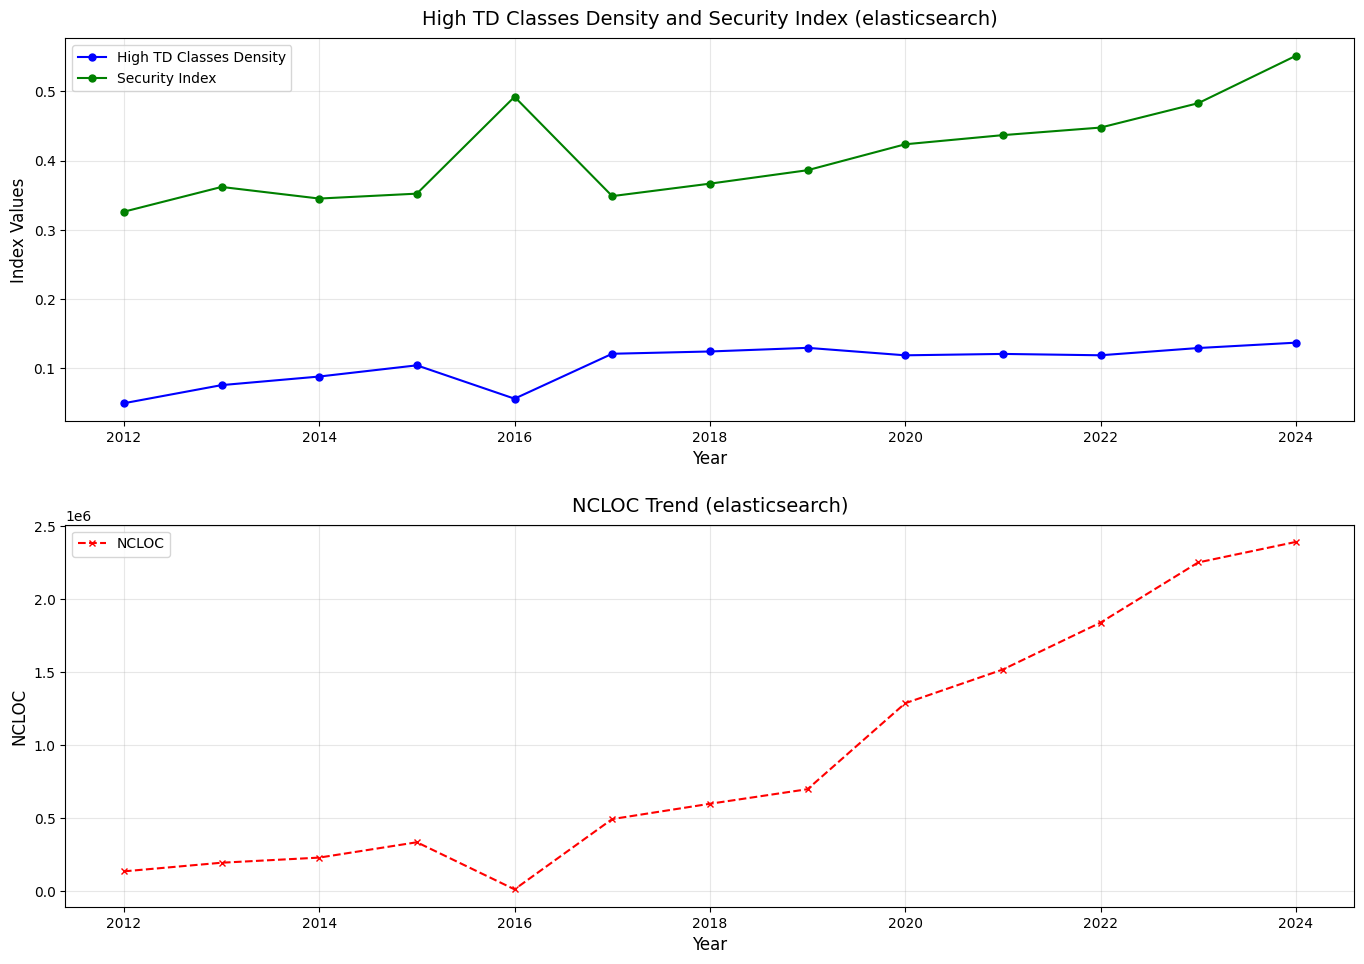


--- Project: ghidra ---

ADF Test for High TD Classes Density:
Test Statistic                -7.775348e+00
p-value                        8.699226e-12
#Lags Used                     0.000000e+00
Number of Observations Used    3.000000e+00
Critical Value (1%)           -1.041719e+01
Critical Value (5%)           -5.778381e+00
Critical Value (10%)          -3.391681e+00
dtype: float64

ADF Test for Security Index:
Test Statistic                -8.432387e+00
p-value                        1.855105e-13
#Lags Used                     0.000000e+00
Number of Observations Used    3.000000e+00
Critical Value (1%)           -1.041719e+01
Critical Value (5%)           -5.778381e+00
Critical Value (10%)          -3.391681e+00
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: -0.4000, p-value: 0.6000


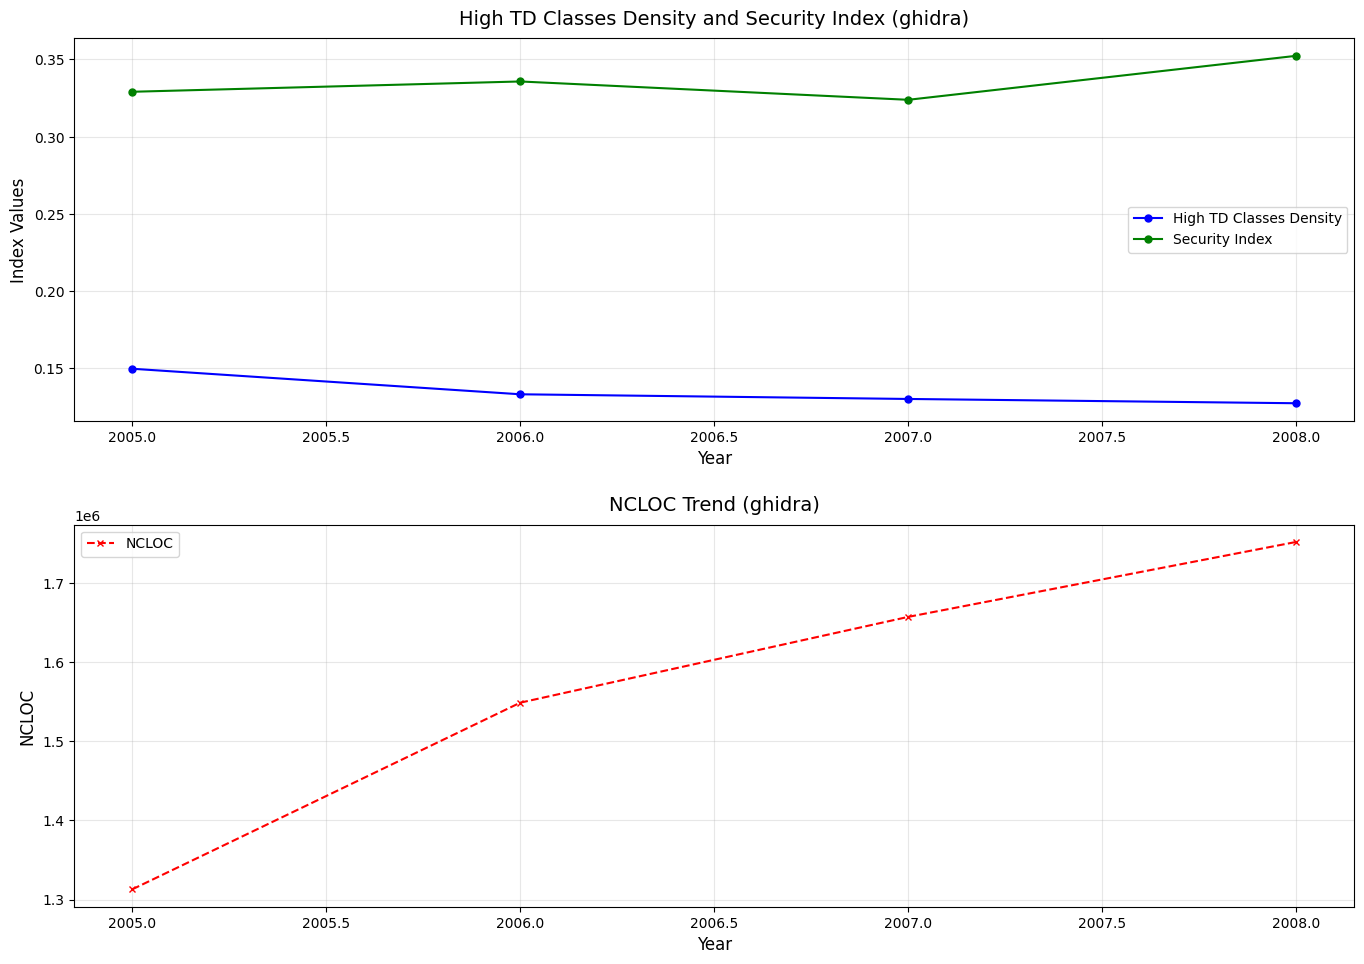


--- Project: guava ---

ADF Test for High TD Classes Density:
Test Statistic                 -0.908263
p-value                         0.785239
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64

ADF Test for Security Index:
Test Statistic                 -2.083346
p-value                         0.251264
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: -0.5941, p-value: 0.0152


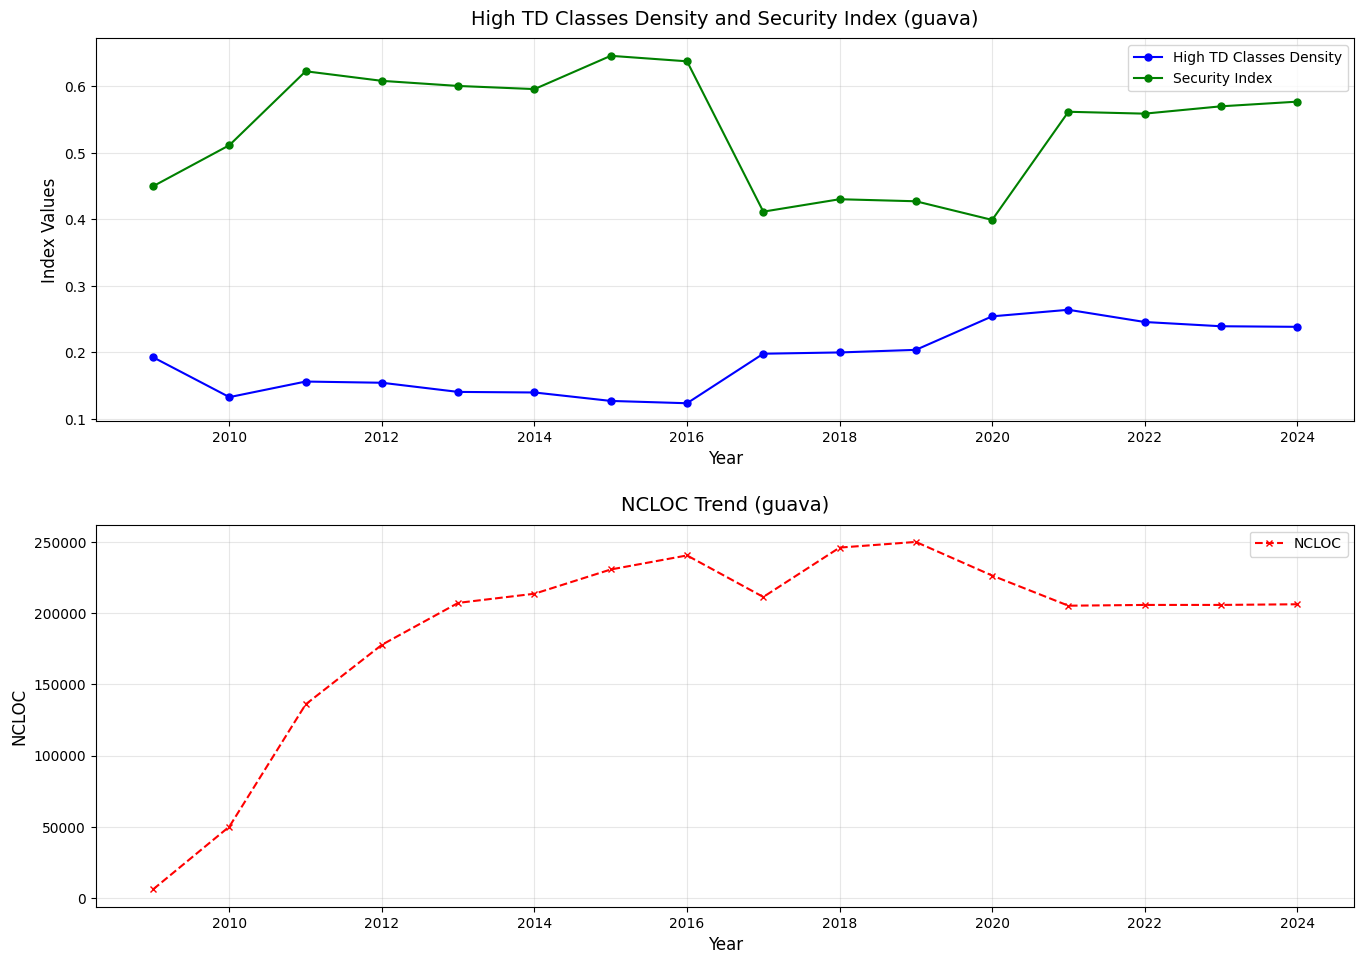


--- Project: kafka ---

ADF Test for High TD Classes Density:
Test Statistic                 -2.048394
p-value                         0.265765
#Lags Used                      1.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

ADF Test for Security Index:
Test Statistic                -4.439898
p-value                        0.000252
#Lags Used                     5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: 0.8190, p-value: 0.0003


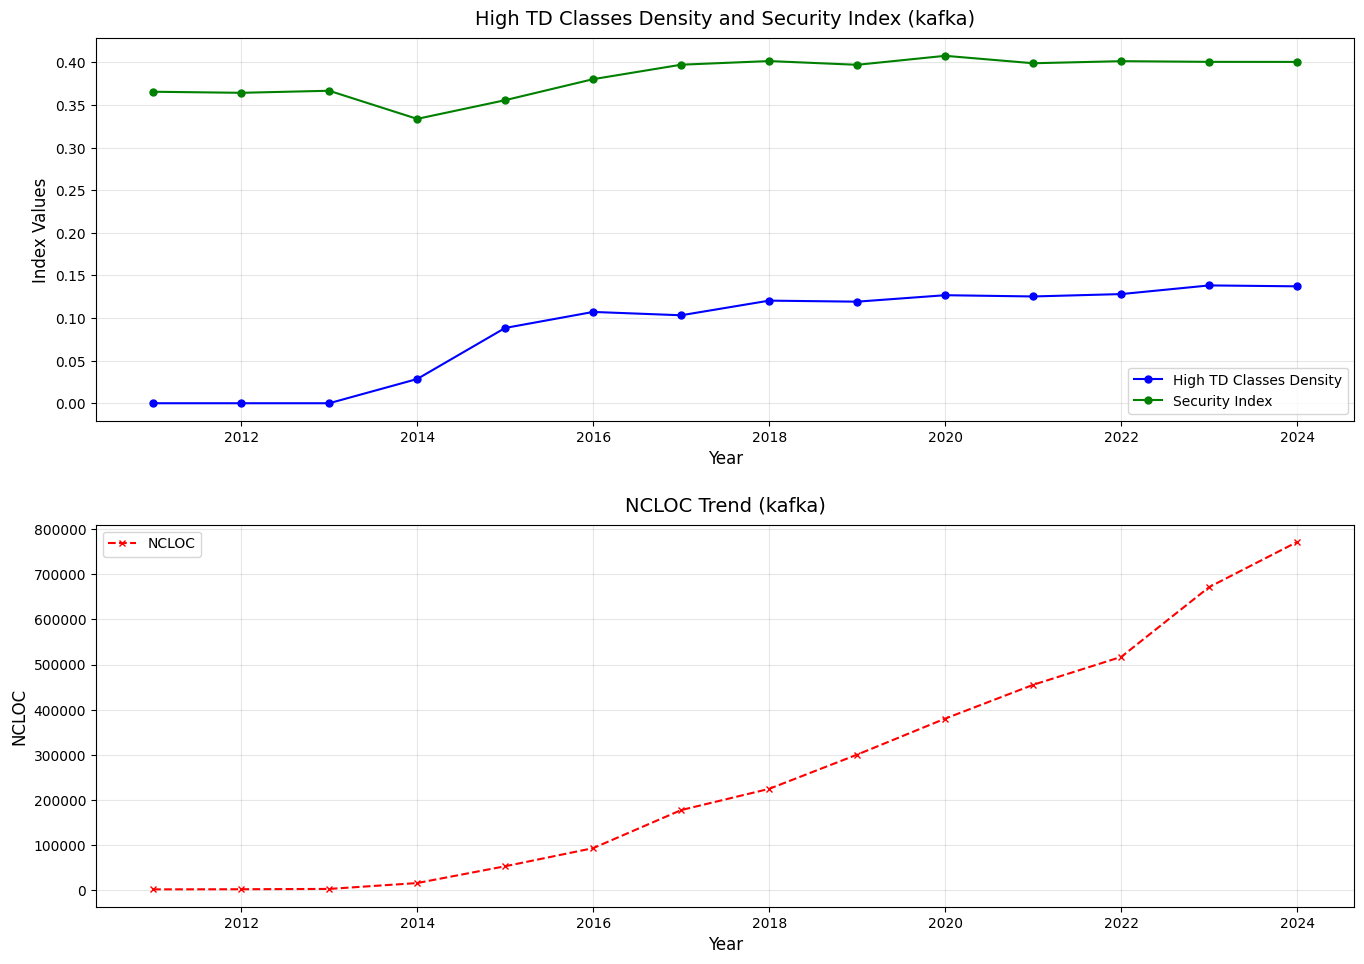


--- Project: spring-boot ---

ADF Test for High TD Classes Density:
Test Statistic                -2.550462
p-value                        0.103674
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64

ADF Test for Security Index:
Test Statistic                 2.737721
p-value                        0.999088
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: 0.1748, p-value: 0.5868


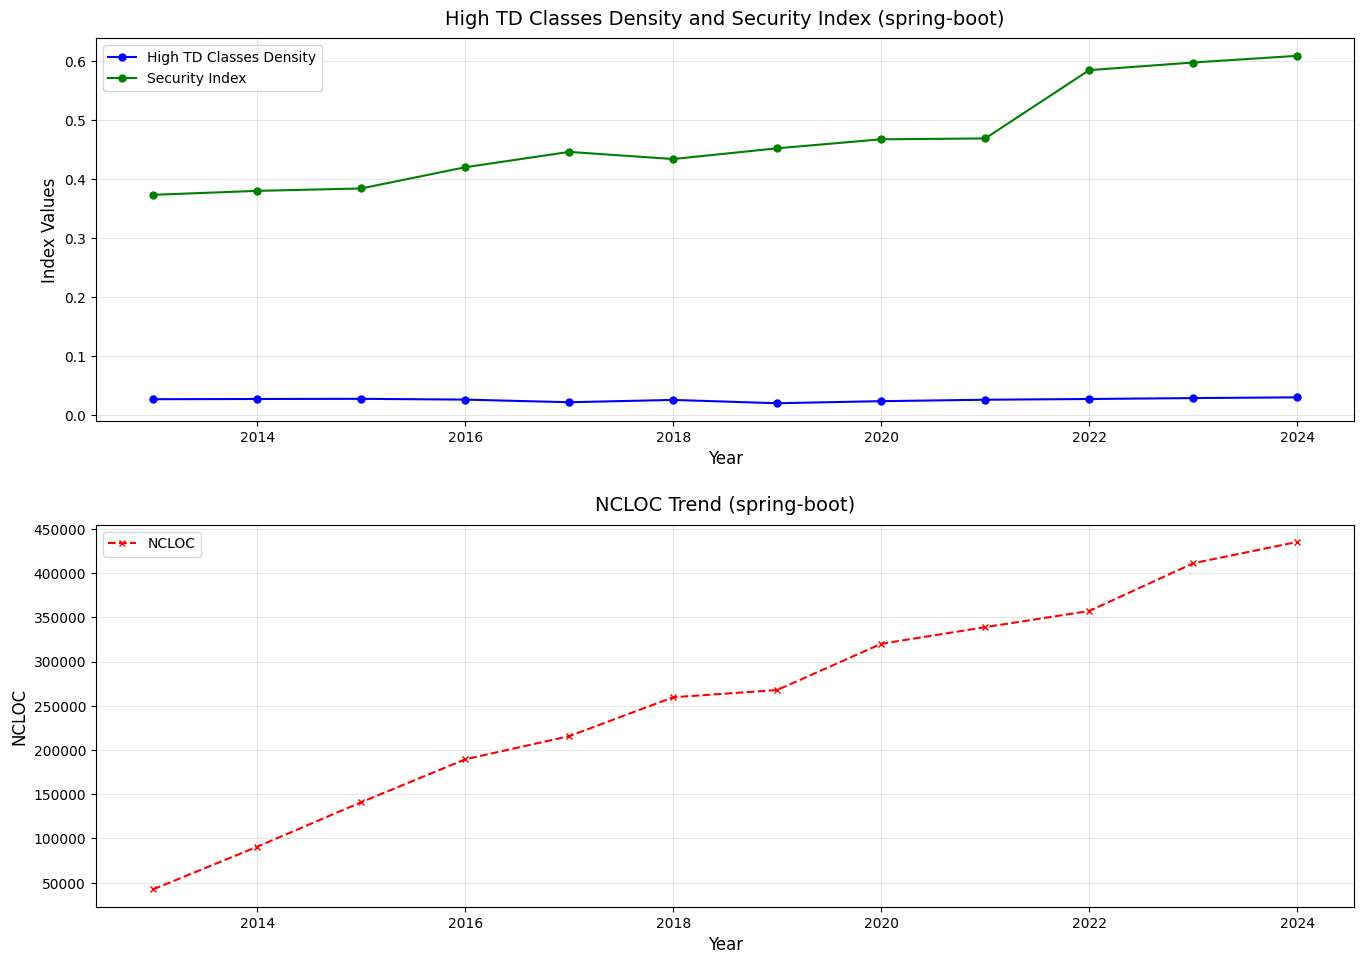


--- Project: spring-framework ---

ADF Test for High TD Classes Density:
Test Statistic                 -3.409439
p-value                         0.010641
#Lags Used                      0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64

ADF Test for Security Index:
Test Statistic                  2.696942
p-value                         0.999087
#Lags Used                      6.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64

Spearman Correlation between High TD Classes Density and Security Index:
Correlation: 0.3701, p-value: 0.1437


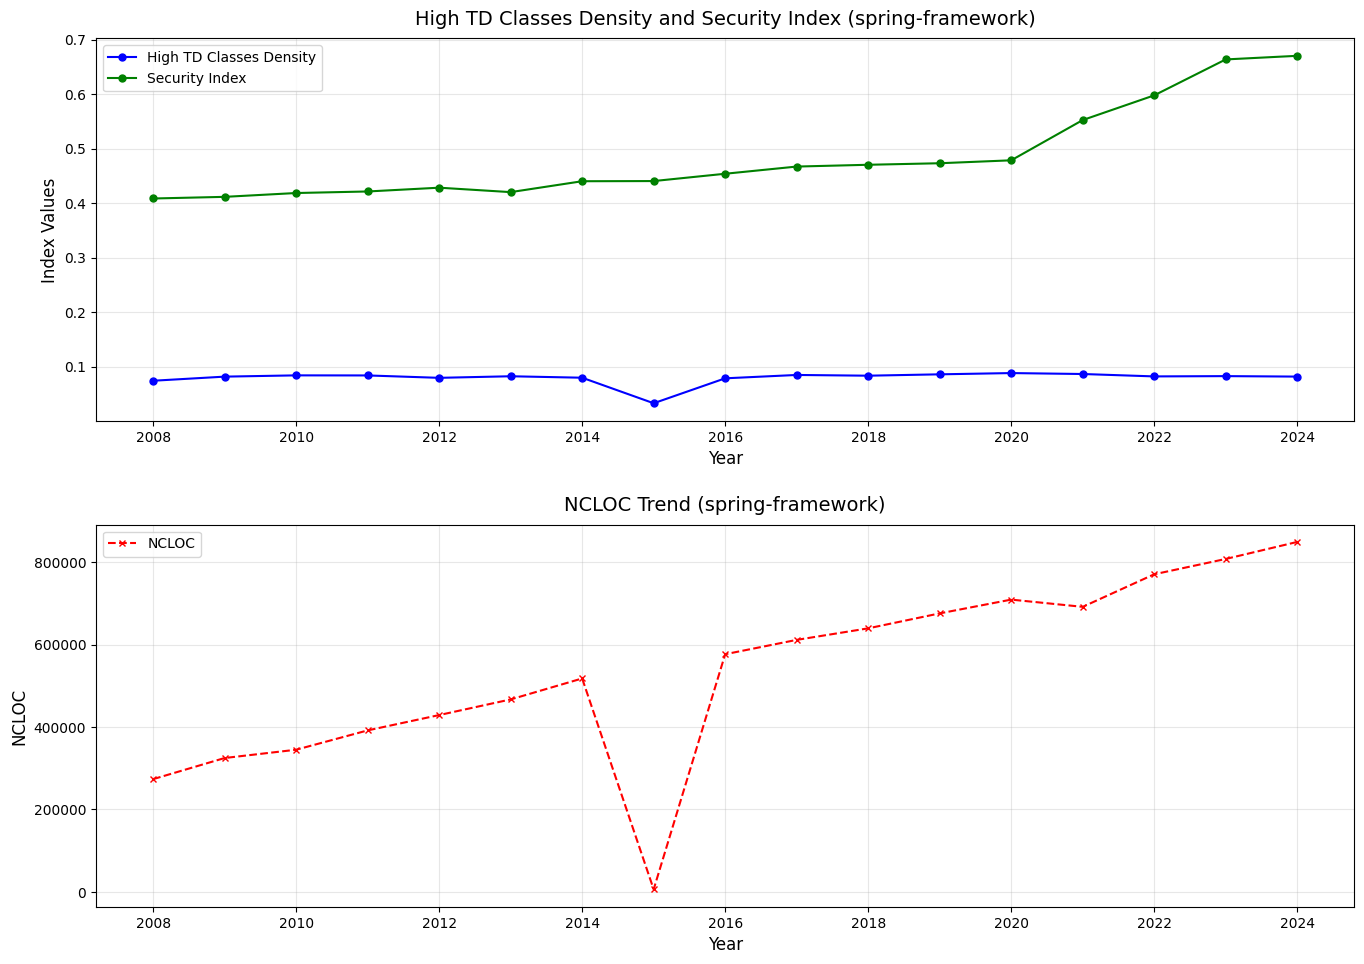

In [16]:
project_yearly_data = main_dataset_df.groupby(['project_name', 'year']).agg({
    'high_td_classes_density': 'mean',
    'security_index': 'mean',
    'ncloc': 'mean'
}).reset_index()

def adf_test(timeseries):
    """Perform the Augmented Dickey-Fuller test for stationarity."""
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    return dfoutput

for project in project_yearly_data['project_name'].unique():
    project_data = project_yearly_data[project_yearly_data['project_name'] == project]

    print(f"\n--- Project: {project} ---")

    print("\nADF Test for High TD Classes Density:")
    adf_result_high_td = adf_test(project_data['high_td_classes_density'])
    print(adf_result_high_td)

    print("\nADF Test for Security Index:")
    adf_result_security = adf_test(project_data['security_index'])
    print(adf_result_security)

    correlation, p_value = spearmanr(project_data['high_td_classes_density'], project_data['security_index'])
    print(f"\nSpearman Correlation between High TD Classes Density and Security Index:")
    print(f"Correlation: {correlation:.4f}, p-value: {p_value:.4f}")

    fig, ax = plt.subplots(2, 1, figsize=(14, 10))

    ax[0].plot(project_data['year'], project_data['high_td_classes_density'],
               label='High TD Classes Density', color='blue', linestyle='-', marker='o', markersize=5)
    ax[0].plot(project_data['year'], project_data['security_index'],
               label='Security Index', color='green', linestyle='-', marker='o', markersize=5)
    ax[0].set_title(f'High TD Classes Density and Security Index ({project})', fontsize=14, pad=10)
    ax[0].set_xlabel('Year', fontsize=12)
    ax[0].set_ylabel('Index Values', fontsize=12)
    ax[0].legend()
    ax[0].grid(alpha=0.3)

    ax[1].plot(project_data['year'], project_data['ncloc'],
               label='NCLOC', color='red', linestyle='--', marker='x', markersize=5)
    ax[1].set_title(f'NCLOC Trend ({project})', fontsize=14, pad=10)
    ax[1].set_xlabel('Year', fontsize=12)
    ax[1].set_ylabel('NCLOC', fontsize=12)
    ax[1].legend()
    ax[1].grid(alpha=0.3)

    plt.tight_layout(pad=2.0)
    plt.show()

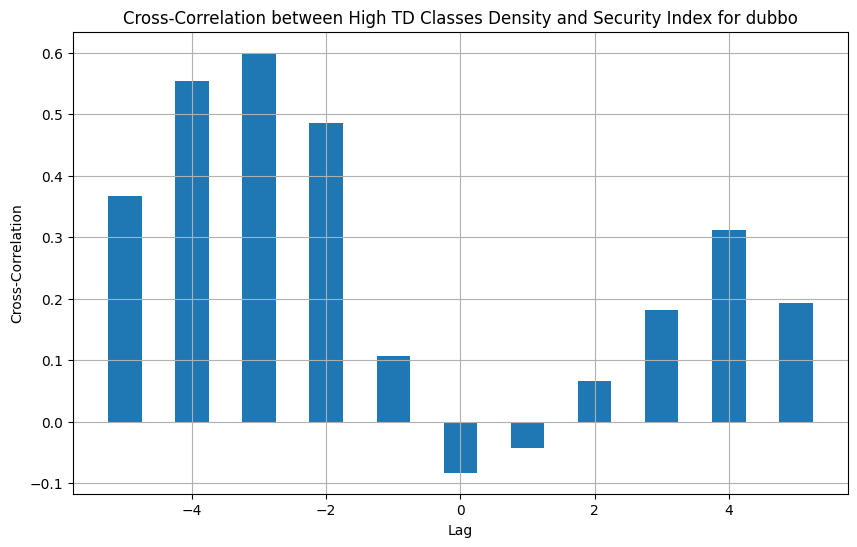

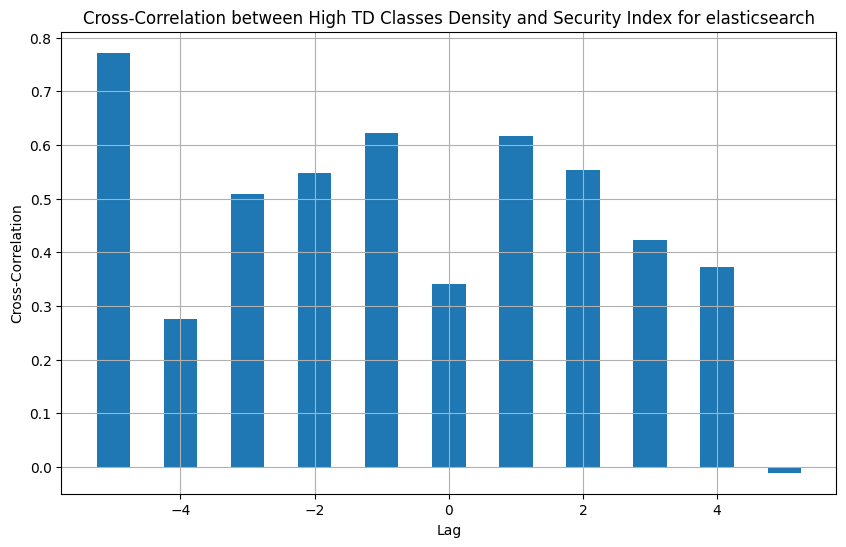

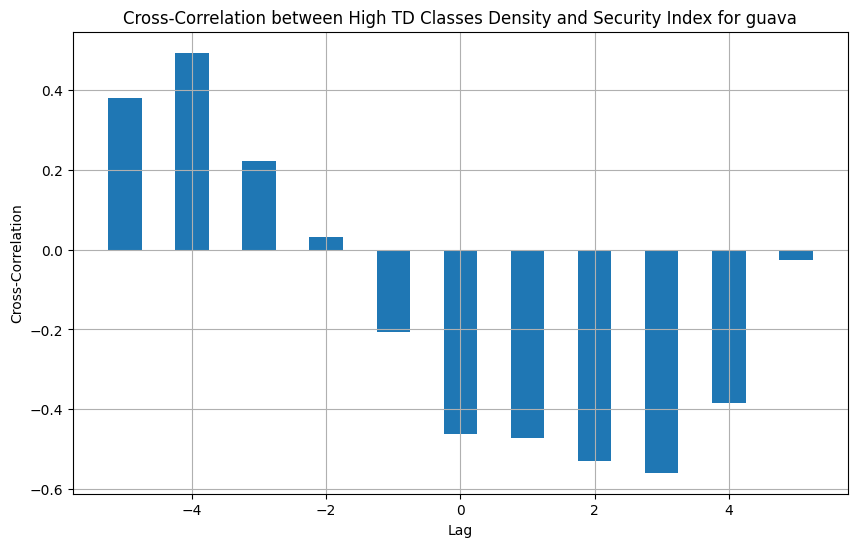

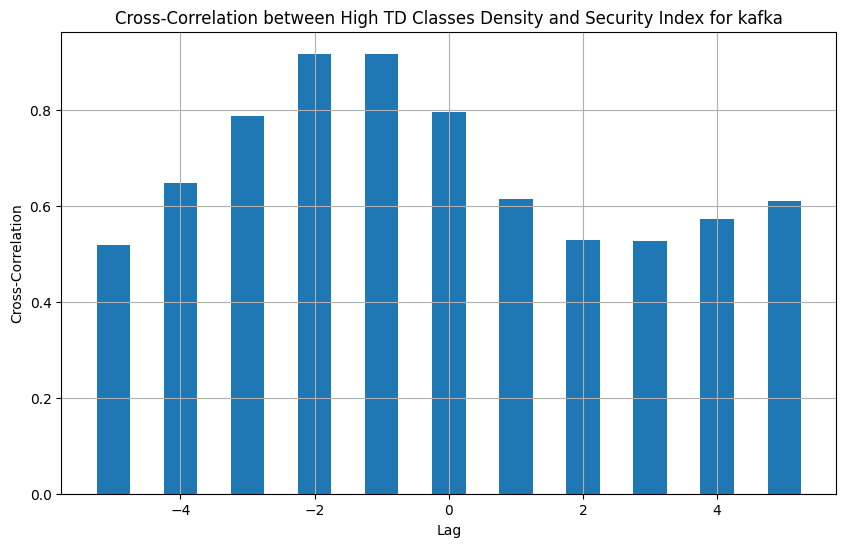

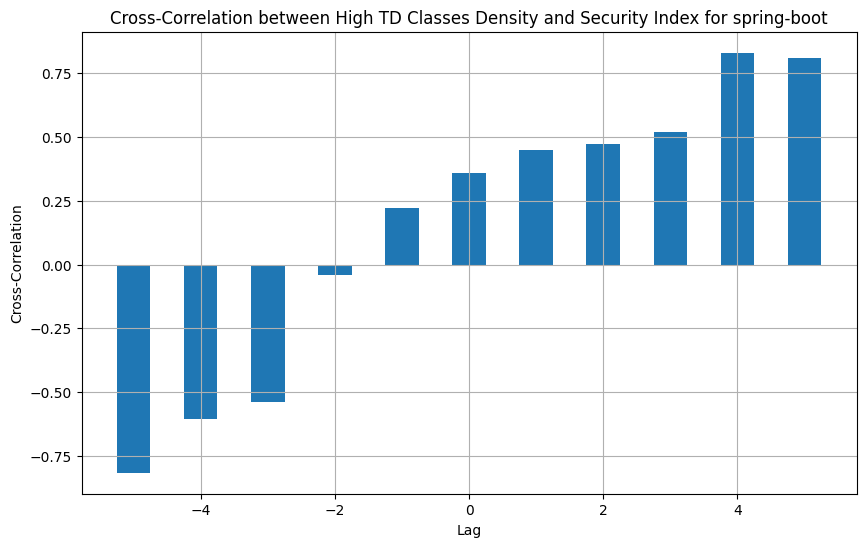

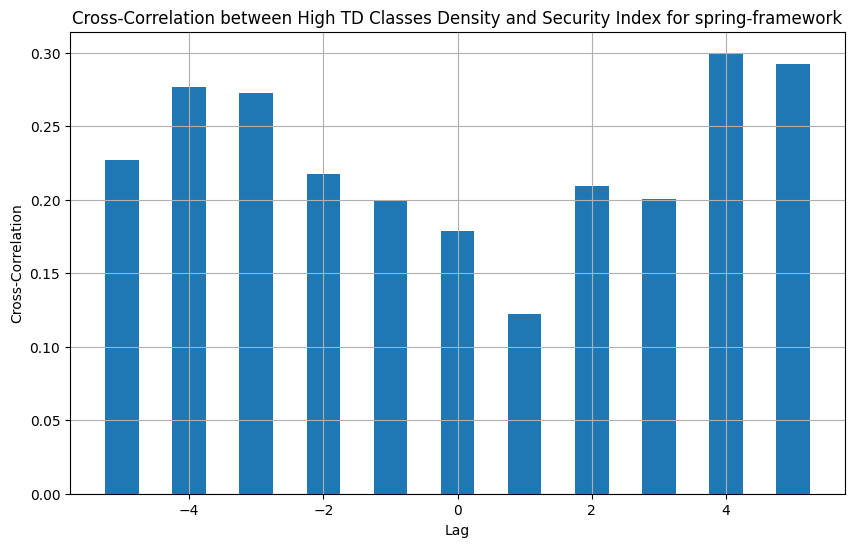

        project_name  lag  cross_correlation
0              dubbo   -5           0.366754
1              dubbo   -4           0.553164
2              dubbo   -3           0.599646
3              dubbo   -2           0.485611
4              dubbo   -1           0.107566
..               ...  ...                ...
61  spring-framework    1           0.121918
62  spring-framework    2           0.209279
63  spring-framework    3           0.200708
64  spring-framework    4           0.299267
65  spring-framework    5           0.292002

[66 rows x 3 columns]


In [17]:
def compute_cross_correlation(series1, series2, max_lag):
    lags = np.arange(-max_lag, max_lag + 1)
    cross_corr = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, cross_corr

grouped_data = main_dataset_df.groupby(['project_name', 'year']).agg({
    'high_td_classes_density': 'mean',
    'security_index': 'mean'
})

max_lag = 5

cross_corr_results = []

for project, group in grouped_data.groupby(level='project_name'):
    group = group.sort_index(level='year')

    group = group.dropna()

    if len(group) > max_lag:
        lags, cross_corr_values = compute_cross_correlation(group['high_td_classes_density'], group['security_index'], max_lag)

        for lag, corr_value in zip(lags, cross_corr_values):
            cross_corr_results.append({
                'project_name': project,
                'lag': lag,
                'cross_correlation': corr_value
            })

        plt.figure(figsize=(10, 6))
        plt.bar(lags, cross_corr_values, width=0.5)
        plt.xlabel('Lag')
        plt.ylabel('Cross-Correlation')
        plt.title(f'Cross-Correlation between High TD Classes Density and Security Index for {project}')
        plt.grid(True)
        plt.show()

cross_corr_df = pd.DataFrame(cross_corr_results)
print(cross_corr_df)


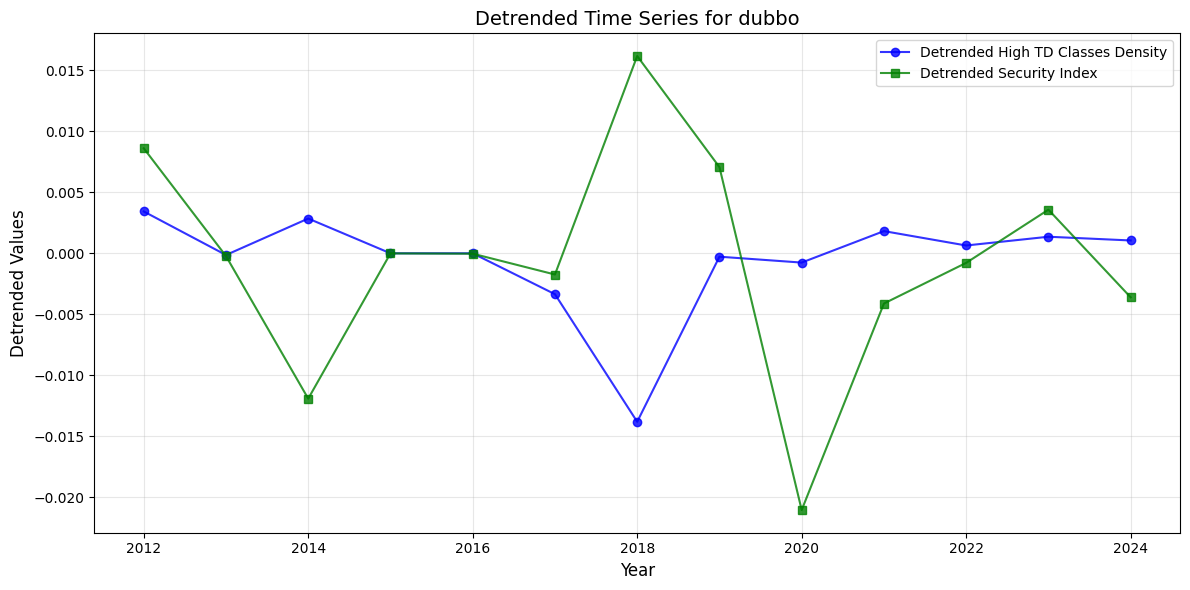

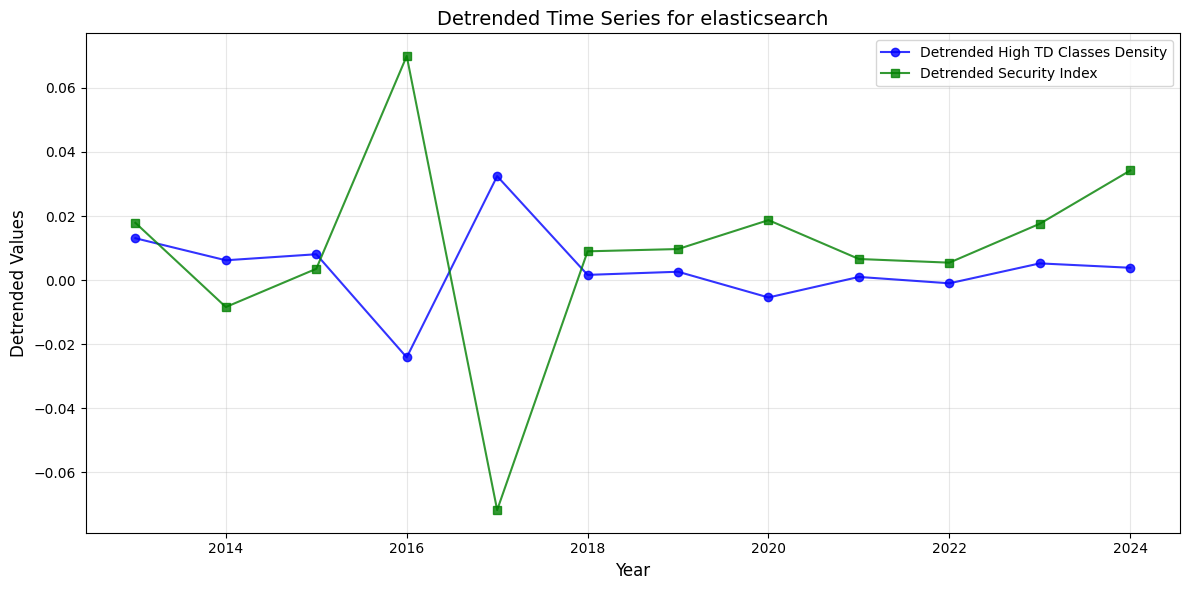

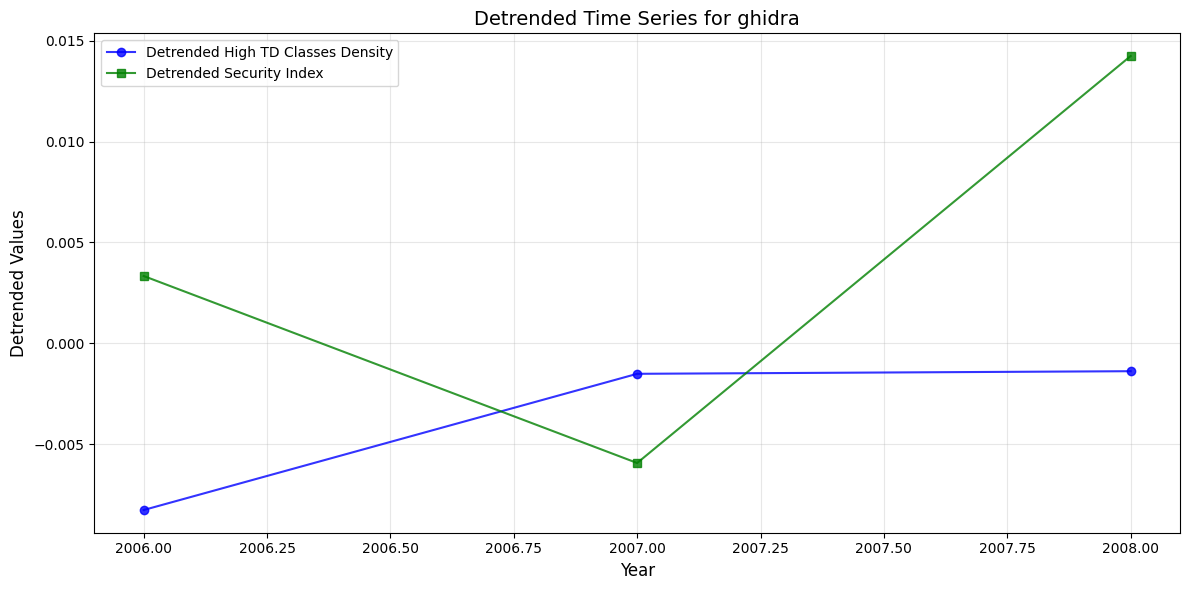

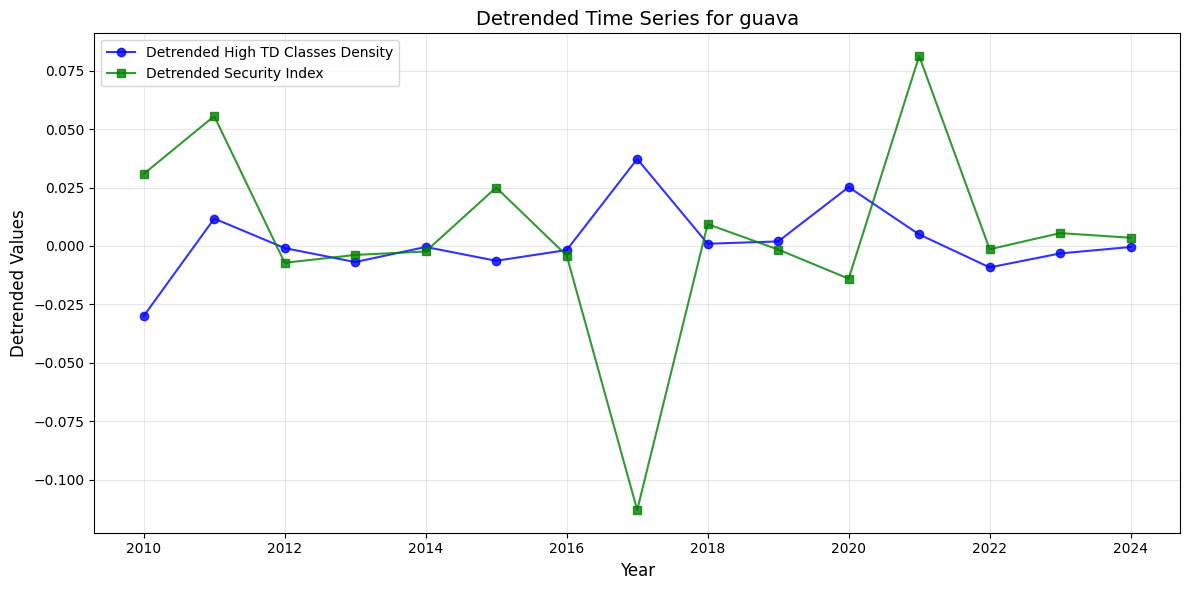

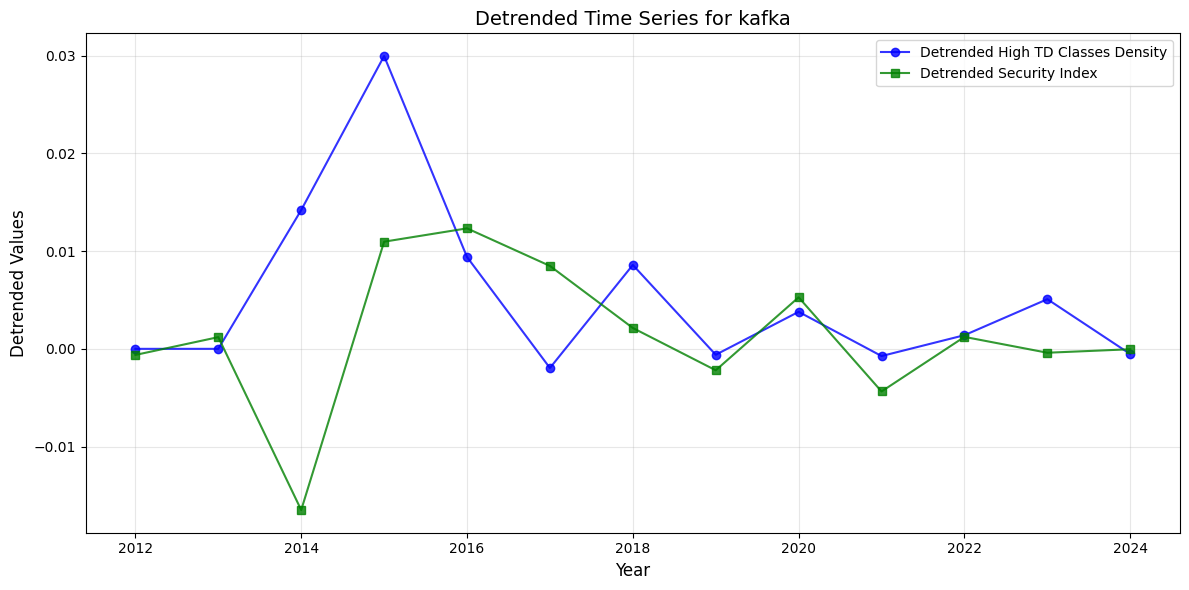

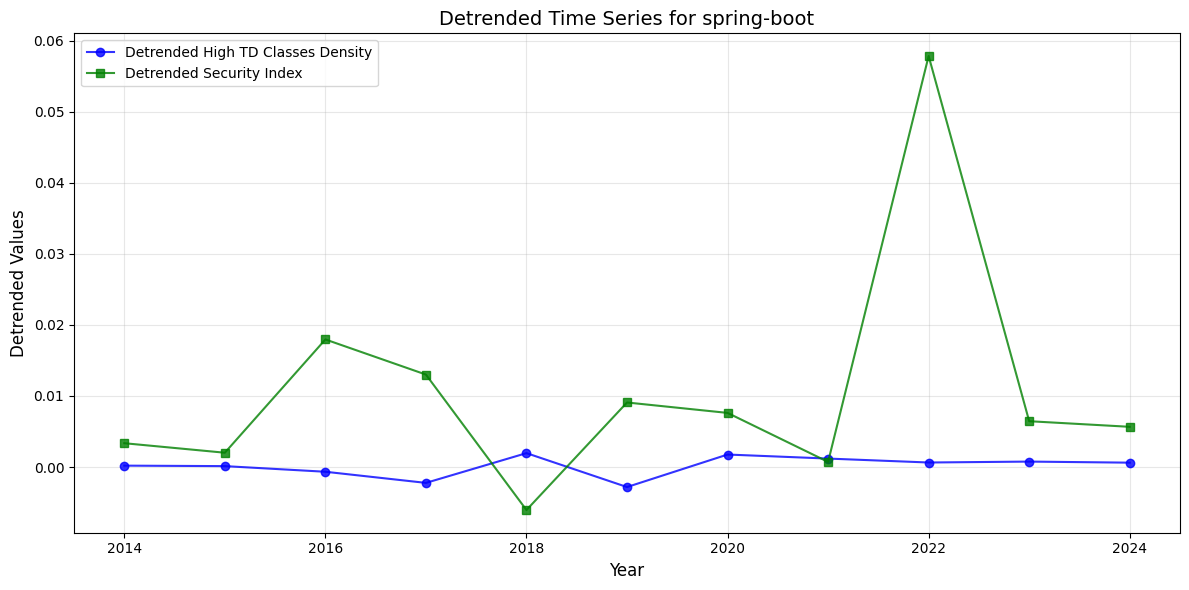

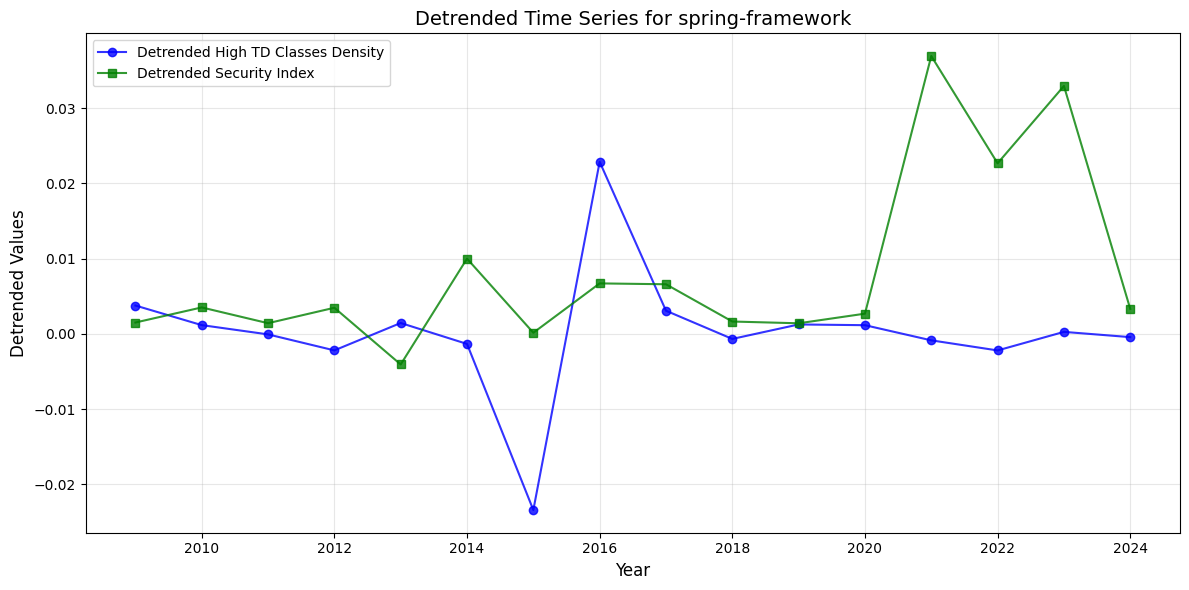

Correlation Results Across Projects:
       Project Name  Spearman Correlation   p-value
0             dubbo             -0.134801  0.660610
1     elasticsearch             -0.496503  0.100603
2            ghidra              0.500000  0.666667
3             guava             -0.196429  0.482899
4             kafka              0.294361  0.328938
5       spring-boot             -0.490909  0.125204
6  spring-framework             -0.170588  0.527610


In [18]:
grouped_data = main_dataset_df.groupby(['project_name', 'year']).agg({
    'high_td_classes_density': 'mean',
    'security_index': 'mean'
}).reset_index()

results = []

for project in grouped_data['project_name'].unique():
    project_data = grouped_data[grouped_data['project_name'] == project].sort_values('year')

    window_size = 2
    project_data['high_td_classes_density_trend'] = project_data['high_td_classes_density'].rolling(window=window_size).mean()
    project_data['security_index_trend'] = project_data['security_index'].rolling(window=window_size).mean()

    project_data['detrended_td'] = project_data['high_td_classes_density'] - project_data['high_td_classes_density_trend']
    project_data['detrended_security'] = project_data['security_index'] - project_data['security_index_trend']

    detrended_data = project_data[['year', 'detrended_td', 'detrended_security']].dropna()

    if len(detrended_data) > 1:
        correlation, p_value = spearmanr(detrended_data['detrended_td'], detrended_data['detrended_security'])

        results.append({
            'Project Name': project,
            'Spearman Correlation': correlation,
            'p-value': p_value
        })

        plt.figure(figsize=(12, 6))
        plt.plot(detrended_data['year'], detrended_data['detrended_td'], label='Detrended High TD Classes Density', color='blue', marker='o', alpha=0.8)
        plt.plot(detrended_data['year'], detrended_data['detrended_security'], label='Detrended Security Index', color='green', marker='s', alpha=0.8)
        plt.title(f'Detrended Time Series for {project}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Detrended Values', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(results)

print("Correlation Results Across Projects:")
print(results_df)
